In [1]:
# Import Packages
import pandas as pd
import yfinance as yf # Install yfinance package as dependency
from quantbt import Portfolio

print('Modules Loaded Successfully!')

Modules Loaded Successfully!


In [2]:
# Initialize some data sets from Yahoo finance
syms = ["AAPL","META","NFLX","AMZN","GOOG"]
data = yf.download(syms, '2015-01-01','2023-09-20')

# Only use the CA Adjusted Close columns
prices_df = data[['Adj Close']]; prices_df.columns = prices_df.columns.droplevel()

dates  = prices_df.index
prices = prices_df.to_dict(orient='index')

print('Data Cleaned and Loaded')

[*********************100%%**********************]  5 of 5 completed
Data Cleaned and Loaded


In [3]:
# Initialize Portfolio object
samplePortfolio = Portfolio({},100.0,name='Sample Portfolio',datadump=False)

# Set some costs for realistic assumption
samplePortfolio.setFixedTransactionCosts({asset:0.0001 for asset in prices_df.columns})
samplePortfolio.setBorrowCosts({asset:0.004 for asset in prices_df.columns})
samplePortfolio.setAnnualManagementFee(0.005)

# Define Rebalance Trigger - Every Month
rebalanceTrigger = pd.offsets.BMonthEnd()

# Simple Static Weights For Rebalance - Equal weight at each rebalance
targetWeights = { sym : 1/len(syms) for sym in syms }

print('Portfolios Initalized!')

Portfolios Initalized!


In [4]:
print(f'Beginning backtest from {dates[0]} to {dates[-1]}')

for i,date in enumerate(dates):
    
    # Design strategy rules here
    if date == rebalanceTrigger.rollforward(date):
        samplePortfolio.rebalance(targetWeights,prices[date],date)

    # Log / sign pnl at every iteration 
    samplePortfolio.signOff(date,prices[date])

print('Backtest Complete!')

Beginning backtest from 2015-01-02 00:00:00 to 2023-09-19 00:00:00
Backtest Complete!


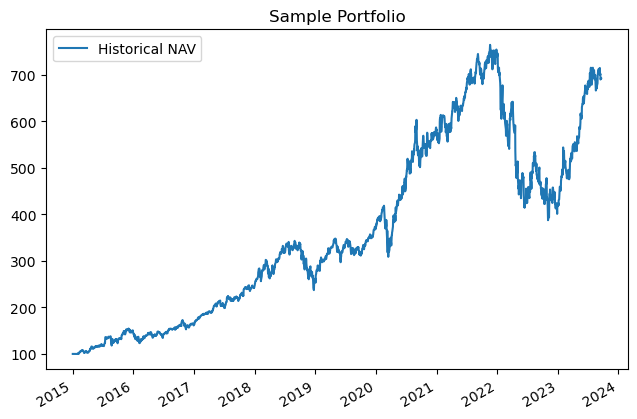

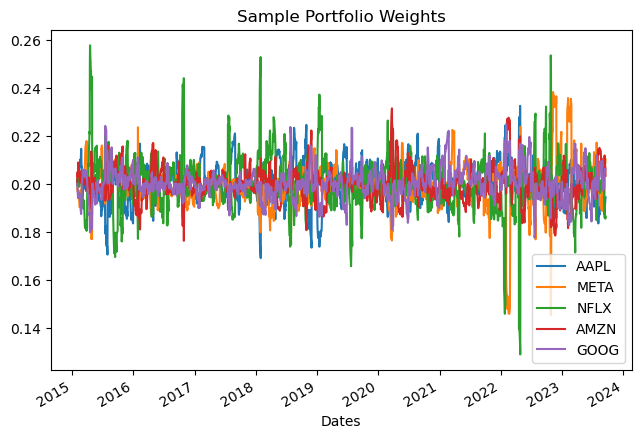

In [5]:
# Examine Portfolio Performance
samplePortfolio.plotNAV();
samplePortfolio.plotWeights();

In [7]:
samplePortfolio.getPerformanceStatistics(historical=False).T

,2023-09-19
Annual Returns,0.248469
Annual Volatility,0.280655
Sharpe Ratio,0.885321
Cumulative Return,5.921565
Maximum Drawdown,-0.493019
Sortino Ratio,1.145801
Calmar Ratio,-0.503975
Total Transaction Costs,0.182181
